# Assignment 1: Regression 
### CS 4262/5262 (Foundations of Machine Learning)<br><br>Vanderbilt University, Spring 2022<br><br>Due date/time: Check with Brightspace
---
<br>In this first assignment, you will have a chance to implement linear and polynomial regression models. In addition to programming tasks (marked with #TODO), there are some short-answer questions throughout the notebook. Please do not hesitate to ask for clarification. 

### Please enter your name:  Keshvi Mahalingam


---
## Part 1: Dataset
Here, we will be looking at a sample of Boston housing data from around the 1970s. Specifically, you will build a model that predicts the median price of a house given the average number of rooms. 

You can learn more about the data here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import random
import sklearn.datasets 

In [3]:
'''
Fetches data of interest: median Boston housing prices for an average number of rooms (in the 1970s).
@return average number of rooms in house (numpy.ndarray), median price of house (numpy.ndarray)
'''
def fetch_housing_data():
    housing_data = sklearn.datasets.load_boston()
    num_rooms = housing_data.data[:,5]
    median_price = housing_data.target
    return num_rooms, median_price 

'''
Renders a simple (x,y) plot. 
@param x (numpy.ndarray) - average number of rooms 
       y (numpy.ndarray) - median price of house 
'''
def simple_plot(x,y):
    plt.scatter(x,y)
    plt.title('Boston Housing')
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Median Price (1000s)')
    plt.show()

**Run the two functions above to display a plot of the data. Based on the plot, do you think linear regression will be able to effectively model the data? Why or why not?**

Response: I think that linear regression will model the data effectively because the data appears to conform to an overall positive linear trend. <br>


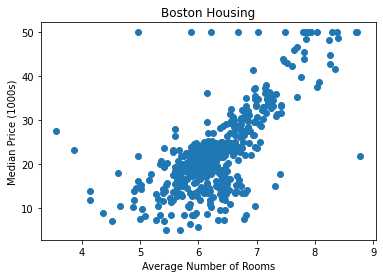

In [3]:
#TODO
# Run the functions here. 
x, y = fetch_housing_data()
simple_plot(x,y)

The `split_train_test()` function below will split the data into a training set and test set. Run the cell (no need to call the function yet).

**What is the definition of overfitting? Why is it necessary to have both training and test sets?**

Response: Overfitting occurs when a model fits its training set too well. When a model becomes overfitted, it loses its potential as a predictive tool. An overfitted model is only useful for making predictions about its training set. If we test a model using the set we used to train it, we cannot validly gauge the accuracy of our model's predictions. A test set is necessary because it allows us to evaluate the performance of our trained model. <br>


In [4]:
'''
Partitions a dataset into a training set and a test set (80/20 split, respectively). 
Shuffles dataset before splitting. 
@param x - data inputs (numpy.ndarray)
       y - data targets (numpy.ndarray)
@return training set inputs, 
        training set targets, 
        test set inputs,
        test set targets (all numpy.ndarray)
'''
def split_train_test(x, y):
    xy = list(zip(x, y))
    random.shuffle(xy)
    x, y = zip(*xy)
    
    split = int(len(x)*0.8)
    train_x = np.array(x[:split])
    train_y = np.array(y[:split])
    test_x = np.array(x[split:])
    test_y = np.array(y[split:])
    
    train_y = np.reshape(train_y, (len(train_y),1))
    test_y = np.reshape(test_y, (len(test_y),1))
    
    return train_x, train_y, test_x, test_y

---
## Part 2: Simple Linear Regression
For the `SimpleLinearRegressionModel` class below, fill in the incomplete methods using their respective descriptions. All methods you should fill out are marked with a #TODO. This model uses a Mean Squared Error cost function and gradient descent to optimize the parameters. 

In [5]:
class SimpleLinearRegressionModel():
    
    '''
    Implementation of simple linear regression using gradient descent
    @param x (numpy.ndarray) - training set of 'single-feature' inputs
           y (numpy.ndarray) - training set of corresponding targets
           theta (numpy.ndarray) - model parameters in the form of [intercept, coefficient]
           alpha (float) - gradient descent step size
    '''
    def __init__(self, x, y, theta, alpha):
        self.x = x
        self.y = y
        self.theta = theta
        self.alpha = alpha
     
    '''
    Equation for the regression line. 
    input x_i (float) - single input feature
    @return corresponding model output (float)
    '''
    #TODO 
    def h(self, x_i):
        return (self.theta[0] + (self.theta[1] * x_i))
    
    '''
    Renders a plot of the training data and the regression line based on current model parameters.
    ''' 
    def plot_current_model(self):
        reg_line_y = [self.h(x_i) for x_i in self.x]
        plt.scatter(self.x, self.y)
        plt.plot(self.x, reg_line_y, color='g')
        plt.title('Boston Housing')
        plt.xlabel('Average Number of Rooms')
        plt.ylabel('Median Price')
        plt.show()
    
    '''
    Loss function measuring mean squared error of the regression line for a given training set and model parameters. 
    @return MSE based on the current parameters (float)
    '''
    #TODO
    def J(self):
        m = len(self.y)
        mse = 0
        
        for i in range(m):
            mse += float((self.h(self.x[i]) - self.y[i])**2)
        
        return 0.5 / m * mse
    
    '''
    Update the model parameters (i.e. the two theta values) for one gradient descent step. Hint: this involves 
    computing partial derivatives. 
    '''
    #TODO
    def gradient_descent_step(self):
        m = len(self.y)
        d_J0 = 0
        d_J1 = 0
        
        for i in range(m):
            d_J0 += (self.h(self.x[i]) - self.y[i]) / m
            d_J1 += ((self.h(self.x[i]) - self.y[i]) * self.x[i]) / m
        
        self.theta[0] -= (self.alpha * d_J0.item())
        self.theta[1] -= (self.alpha * d_J1.item())
        
    '''
    Run gradient descent to optimize the model parameters.
    Keep track of the value of the cost function. You may change the default threshold for convergence.
    @param threshold (float) - run gradient descent until the magnitude of the gradient is below this value. 
    @return a list storing the value of the cost function after every step of gradient descent (float list)
    '''
    #TODO
    def run_gradient_descent(self, threshold=0.001):
        J_vals = []
        J_prev = 0
        while abs(J_prev - self.J()) >= threshold:
            J_prev = self.J()
            J_vals.append(J_prev)
            self.gradient_descent_step()
        return J_vals
    
    '''
    Renders plot of MSE at each iteration of gradient descent
    @param losses (float list) - MSE after every gradient descent step 
    '''
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

Before applying this model to the Boston housing dataset, let's test your code on a smaller dataset. In the debugging function below, first create a small set of 25 training examples ((x,y) pairs) that have an approximately linear relationship. You can do so by first generating pairs that have a perfect linear relationship, then adding a bit of random noise. Then, run your Simple Linear Regression model on this dataset and display the plot of the final regression line, superimposed on the 25 datapoints (call the `plot_current_model()` method). 

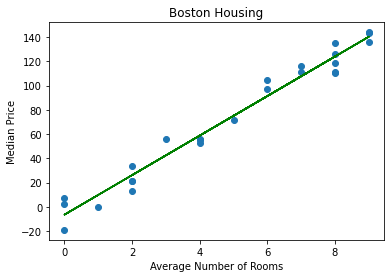

In [6]:
'''
Function for debugging the simple linear regression model.
'''
#TODO
def debug_SLR_model():
    x = np.array([random.randrange(0.0, 10.0) for i in range(25)])
    y = np.array([(16 * x_i - 5) for x_i in x])
    
    for i in range(25):
        y[i] += random.randrange(-15.0, 15.0)
    
    test_model = SimpleLinearRegressionModel(x, y, [10.0, 10.0], 0.04)
    test_model.run_gradient_descent()
    
    test_model.plot_current_model()

debug_SLR_model()

Great, your model looks like it'll work. Next, partition the Boston housing data into a training set and a test set (use the `split_train_test()` function from Part 1). Then, run the training set through new instances of `SimpleLinearRegression`. Try a value within the [$-40$,$-20$] range for $\theta_0$ and a value within the [$0$,$20$] range for $\theta_1$.

Use the `plot_MSE_loss()` method to display the learning curve for three different step sizes (alpha): 0.001, 0.01, and 0.1.

**How do the learning curves differ? What can you infer about the effect of changing alpha, particularly as it increases/decreases?**

Response: We can observe from the learning curve of the largest alpha value that when the alpha value becomes too large, it ends up exceeding the optimal loss value entirely. The alpha value of 0.01 results in the fewest number of steps, meaning it has the steepest learning curve and therefore the greatest learning rate of the three values. As the alpha value gets smaller, the learning curve becomes less steep and the learning rate decreases. This makes sense because the step size gets smaller, so it takes more steps to reach the ideal value. <br>


In [7]:
# Assess the different step sizes here (next four cells).
num_rooms, median_price = fetch_housing_data()
train_x, train_y, test_x, test_y = split_train_test(num_rooms, median_price)
#theta_0 = random.randrange(-40.0, -19.0)
#theta_1 = random.randrange(0.0, 21.0)

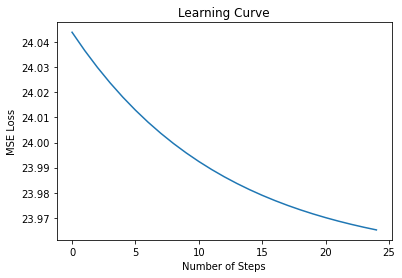

In [8]:
alpha1 = 0.001
#TODO - run an instance of the model and plot the learning curve with this value of alpha
boston_housing1 = SimpleLinearRegressionModel(train_x, train_y, [-21, 7], alpha1)
losses = boston_housing1.run_gradient_descent()
boston_housing1.plot_MSE_loss(losses)

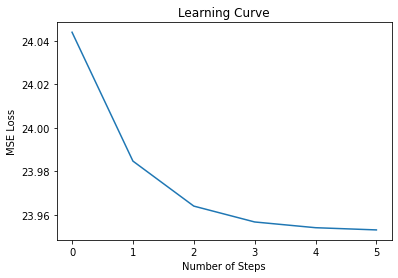

In [9]:
alpha2 = 0.01
#TODO - run an instance of the model and plot the learning curve with this value of alpha
boston_housing2 = SimpleLinearRegressionModel(train_x, train_y, [-21, 7], alpha2)
losses = boston_housing2.run_gradient_descent()
boston_housing2.plot_MSE_loss(losses)

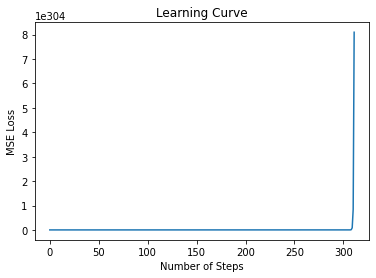

In [10]:
alpha3 = 0.1
#TODO - run an instance of the model and plot the learning curve with this value of alpha
boston_housing3 = SimpleLinearRegressionModel(train_x, train_y, [-21, 7], alpha3)
losses = boston_housing3.run_gradient_descent()
boston_housing3.plot_MSE_loss(losses)

Based on your experiments, report a value of alpha and an initial value of $\theta$ that allowed gradient descent to find a good solution (i.e., parameters $\theta$ that fit the training data well) in a reasonable amount of time. Next, using the `h(x)` method together with your trained model, predict the target values of the test set ('median price') based on the input features of the test set ('average number of rooms'). Finally, for each datapoint in the test set, display a scatter plot of 'average number of rooms' (x-axis) against both the actual 'median house price' value and the model's prediction (y-axis).

Use different colors for the actual vs. predicted values. Include a legend, title, and axis labels (see `simple_plot()` from Part 1 for example code). 

In [11]:
# Evaluate model on test data here (next two cells). 

'''
Make predictions for inputs using a trained SLR model. 
@param model (SimpleLinearRegression) - SLR model with (ideally) optimized parameters
       test_x (numpy.ndarray) - inputs to run through the model 
@return corresponding predictions for the inputs (numpy.ndarray)
'''
#TODO
def SLR_predict(model, test_x):
    reg_line_y = [model.h(x_i) for x_i in test_x]
    return reg_line_y

'''
Renders a plot showing the actual vs SLR-predicted outputs for a set of inputs. 
@param test_x (numpy.ndarray) - model inputs
       test_y (numpy.ndarray) - corresponding actual outputs 
       pred_y (numpy.ndarray) - corresponding predicted outputs
'''
#TODO
def plot_actual_vs_pred(test_x, test_y, pred_y):
    actual = plt.scatter(test_x,test_y, color='b')
    pred = plt.scatter(test_x, pred_y, color='m')
    plt.legend((actual, pred), ('Actual', 'Predicted'), scatterpoints=1, loc='best', ncol=2)
    plt.title('Boston Housing')
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Median Price (1000s)')
    plt.show()

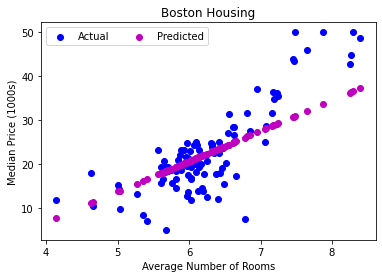

In [12]:
# TODO - select values for theta and alpha based on your work in previous cells
theta =  boston_housing2.theta
alpha = alpha2

slr = SimpleLinearRegressionModel(train_x, train_y, theta, alpha)
losses = slr.run_gradient_descent()
pred_y = SLR_predict(slr, test_x)
plot_actual_vs_pred(test_x, test_y, pred_y)

---
## Part 3: Polynomial Regression 

In Part 2, we modeled the data with a linear function. Now, we will build a polynomial regression model and apply it to the same Boston housing data. We will implement gradient descent, and vectorize operations whenever possible.

In class, we learned that the gradient descent update rule can be written as:
   $\theta := \theta - \alpha \cdot \nabla J(\theta)$,
   and that for Batch Gradient Descent, the $j^{th}$ entry of $\nabla_\theta J(\theta)$ can be expressed as:
 
   $$\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} $$

In the `PolynomialRegressionModel` class below, note that there is a new field `self.degree` in the `init()` method, which specifies the highest polynomial degree in your regression equation. For example, if `self.degree=3`, then the regression equation is $y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \theta_3 x_i^3$.

**Although we are fitting a nonlinear function to our data, why can polynomial regression be considered a case of multiple linear regression?***

Response: We can treat polynomial regression as a special case of multiple linear regression because we are using a linear combination of multiple input features to determine the coefficients of our regression equation. In other words, we are trying to find a linear relationship between the our regression coefficients and y. <br>


<br>**First,** complete the function `form_design_matrix()` below. This function should return the design matrix $X$ for polynomial regression, which is a matrix of dimensions $m \times (d+1)$, where $d$ is the degree of the polynomial. Remember to include the intercept term (i.e., append the 'feature' $x_0 = 1$ to each training example, such that the first column of $X$ consists of all 1's. 

In [13]:
'''
Converts an array of training set inputs into a design matrix, where rows represent 
training inputs and columns represent input features. 
@param training_inputs (numpy.ndarray) - training set of input features
       degree (int) - highest polynomial degree to extend the design matrix into
@return design matrix including the x_0 'feature' - (numpy.ndarray)
'''
#TODO
def form_design_matrix(training_inputs, degree):
    m = len(training_inputs)
    matrix = np.array([[x_i ** d for d in range(degree+1)] for x_i in training_inputs])
    matrix.reshape(m, degree+1)
    return matrix

**Next,** before writing any further code, show that the above expression for the jth entry of the gradient ( = $\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} $) indeed corresponds to the jth entry of $\nabla_\theta J(\theta) = X^T(X\theta - y)$. You can write your derivation below using LaTeX, or upload a separate sheet of paper with a hand-written derivation as a separate document along with this notebook. 

In [ ]:
#TODO
# Show your gradient derivation here, or upload derivation as a separate document.
# if you modify to take in LaTeX, don't forget to change from Code to Markdown for the cell metadata.

**Then,** complete the methods in the `PolynomialRegressionModel` class using vectorization. Assume that the model's training input will be in the form of a design matrix. A lot of your SLR code can be copied over to this new class— modify your methods accordingly to work for any $d$-degree polynomial. 

In [14]:
class PolynomialRegressionModel():
    
    '''
    Implementation of a Polynomial regression model using MSE and Gradient Descent.
    @param X (numpy.ndarray) - training set of input features, as a design matrix
           y (numpy.ndarray) - training set of corresponding targets
           theta (numpy.ndarray) - model parameters (variable coefficients, in order of increasing variable degree)
           alpha (float) - learning step size
           degree (int) - highest polynomial degree
    '''
    def __init__(self, X, y, theta, alpha, degree):
        self.X = X
        self.y = y
        self.theta = theta
        self.alpha = alpha
        self.degree = degree
             
    '''
    Hypothesis - return model prediction 
    @param X (numpy.ndarray) - design matrix of input features
    @return corresponding model output (float)
    '''
    #TODO
    def h(self, X):
        return X @ self.theta
    
    '''
    Renders a plot of the training data and the regression line based on current model parameters.
    ''' 
    def plot_current_model(self):
        reg_curve_y = self.h(self.X)
        plt.scatter(self.X[:,1], self.y)
        plt.scatter(self.X[:,1], reg_curve_y, color='g')
        plt.title('Boston Housing (scaled data)')
        plt.xlabel('Average Number of Rooms')
        plt.ylabel('Median Price')
        plt.show()
    
    '''
    Cost function measuring mean squared error of the regression line for a given training set and model parameters.
    Vectorize your code - no loops!
    @return MSE based on the current parameters (float)
    '''
    #TODO
    def J(self):
        return (0.5 * ((self.h(self.X) - self.y).T @ (self.h(self.X) - self.y)).item() / m)
    
    '''
    Update theta for one gradient descent step. Vectorize your code - no loops!
    @return the gradient of the cost function (numpy.ndarray), for use in run_gradient_descent
    '''
    #TODO
    def gradient_descent_step(self):
        gradient = (1/m) * (self.X.T @ (self.h(self.X) - self.y))
        self.theta -= self.alpha * gradient
        return gradient
       
    '''
    Run gradient descent to optimize the model parameters.
    Keep track of the losses. You may change the default threshold for convergence. 
    Here, we will use a convergence criterion based on the norm of the gradient vector.
    @param threshold (float) - run gradient descent until the absolute norm of the gradient is below this value.
    @return a list storing the value of the cost function after every step of gradient descent (float list)
    '''
    def run_gradient_descent(self, threshold=0.001):
        losses = []
        loss = self.J()
        losses.append(loss)
    
        norm_grad_vec = 1
        while norm_grad_vec > threshold:
            grad_vec = self.gradient_descent_step()
            loss = self.J()
            losses.append(loss)
            norm_grad_vec = np.linalg.norm(grad_vec)
        return losses
    
    '''
    Renders the learning curve of the model during its optmization process. 
    @param losses (float list) - MSE after every gradient descent step 
    '''
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

Next, we will run an instance of the `PolynomialRegressionModel` class with a degree of 3. As feature scaling will help our model to converge more quickly, we can first scale our design matrix (normalize each column to have zero mean, unit variance - except for the column of ones). Here, let's set up the design matrix and perform this feature scaling (you can just execute this code, you do not need to write anything here - but make sure you understand what the code is doing). The resulting scaled design matrix will be your input to `PolynomialRegressionModel` in the next part.

In [15]:
degree = 3
design_mat = form_design_matrix(train_x, degree)
Xz = sc.stats.zscore(design_mat[:,1:]) # scale *except* for the column of ones
m = Xz.shape[0]
ones_vec = np.ones((m,1))
design_mat_scaled = np.hstack((ones_vec,Xz))

**Now,** run an instance of the `PolynomialRegressionModel` class using this design matrix. Experiment with the parameter 'alpha' and the initial value of the vector 'theta'. Plot the data and resulting regression curve using the method `plot_current_model`. 

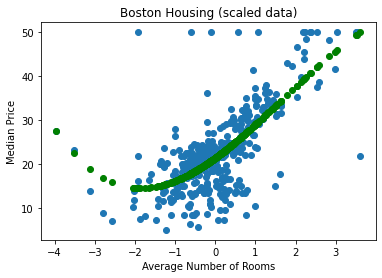

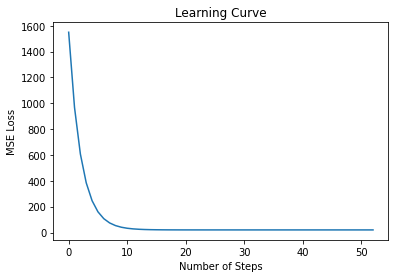

In [31]:
#TODO
# Run an instance of the Polynomial Regression Model with a degree of 3 on the Boston housing data here.
theta_init = np.array([20, -90, 120, -80.0]) # choose this or any other starting point that will converge quickly
theta_init = np.reshape(theta_init, (degree+1,1))

test2 = PolynomialRegressionModel(design_mat_scaled, train_y, theta_init, 0.6, 3)
losses = test2.run_gradient_descent()

test2.plot_current_model()
test2.plot_MSE_loss(losses)

**What do you foresee will happen if you apply this model to the held-out test set?**

Response: I think the model's predictive accuracy will increase if we apply it to the test set, as it will have more training inputs to learn from. <br>


**Lastly,** as an alternative to running gradient descent for linear regression, one can solve directly for the value of $\theta$ that minimizes the least-squares cost function $J(\theta)$, using the equation:
$$ \theta = (X^T X)^{-1} X^T y $$

Please fill in the method `closed_form_solution()` below, using this equation. Run this using the feature-scaled design matrix constructed above, and report the value of $\theta$ it returns, and compare it to the solution you obtained using gradient descent. 

Note:  your predictions will be the same regardless of whether you use the scaled or non-scaled version of the design matrix (optionally, you can check this on your own!). However, for the sake of comparing the values of $\theta$, you can use the feature-scaled design matrix here.

In [32]:
'''
Equation for directly solving for theta which minimizes the least-squares cost function J(theta).
@param X (numpy.ndarray) - model input in the form of a design matrix 
       y (numpy.ndarray) - model output 
@return set of theta values for the regression equation that minimizes J(theta) (numpy.ndarray)
'''
#TODO 
def closed_form_solution(X, y):
    return (np.linalg.inv(X.T @ X) @ X.T @ y)

In [33]:
#TODO - run closed_form_solution()

print('Closed-form:')
print(closed_form_solution(design_mat_scaled, train_y))

print('\nGradient descent: ')
print(test2.theta)

Closed-form:
[[ 22.49059406]
 [-76.19947907]
 [148.26137739]
 [-66.67561147]]

Gradient descent: 
[[ 22.49059406]
 [-71.54387434]
 [138.55687597]
 [-61.57685133]]


**Gradient descent theta compared to closed-form solution theta:**<br>

Response: The closed-form solution and gradient descent theta values were [22.4906, -76.1995, 148.2614, -66.6756] and [22.4906, -71.5439, 138.5569, -61.5769], respectively. <br>


**In what scenario(s) might one choose to use gradient descent over solving the closed-form solution?**

Response: It is better to use the gradient descent theta when handling data with a large number of input features, as the closed-form solution would involve inverting a large matrix and would therefore be much slower than the gradient descent method. <br>


---
## Part 4: Submission 

Once you're ready to submit, create a 'clean' version of your final solutions, removing any extra debugging code you may have written. Next, in the menu bar, click `Kernel > Restart & Clear Output`. Then run your code from top to bottom, so that all the plots are displayed. Back in the menu bar, click `File > Download as > Notebook (.ipynb)` to download your notebook. Don't forget to answer the short answer questions. <em>If you use a separate PDF with your short answer questions, it should be added alongside the ipynb file as a PDF, and zipped up together as your solution.</em>

Please upload this to Brightspace by midnight of the deadline. 